<a href="https://colab.research.google.com/github/Tomas-Ortiz/Multilayer-perceptron/blob/master/Perceptr%C3%B3n_multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sc
#Visualizar gráficos
import matplotlib.pyplot as plt
#Dataset con datos distribuidos en circulos
from sklearn.datasets import make_circles


Entradas: (600, 2)
Salidas: (600, 1)


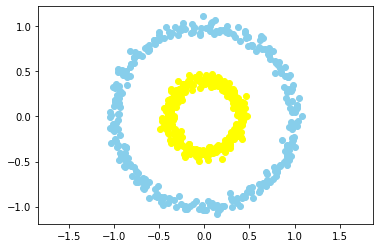

In [ ]:
#Crear datasets

n_ejemplos = 600
n_atributos = 2

#X input (vector de entrada), Y output (salida deseada, única y binaria)

X, Y = make_circles(n_samples=n_ejemplos, factor= 0.4, noise=0.04)

#Para todas las filas (:, entradas), crear una sola dimension (unica salida)
Y = Y[:, np.newaxis]

#X: 600 entradas, con 2 atributos cada entrada
print(f'Entradas: {X.shape}')

#Y: Una salida para cada una de las 600 entradas
print(f'Salidas: {Y.shape}')

#Y == 0 puntos en celeste
#Y == 1 puntos en amarillo
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="yellow")
plt.axis("equal")
plt.show()

In [ ]:
#Clase que permite crear capas con sus respectivos datos

class capa_neuronal():

#Inicializacion aleatoria de los parámetros de cada capa

  def __init__ (self, n_conex, n_neur, func_activ):

    self.func_activ = func_activ
    self.n_neur = n_neur
    self. n_conex = n_conex

    #rand(n_filas, n_columnas)
    #valores aleatorios de -1 a 1

    #b = bias (vector)
    # W = pesos (matriz)
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conex, n_neur) * 2 -1


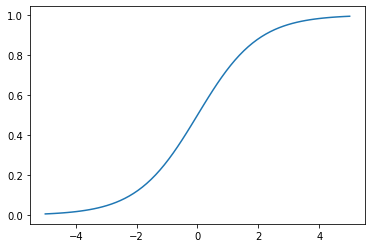

In [ ]:
#Funcion de activacion

#Formula y derivada de la funcion de activación

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1-x))

_x = np.linspace(-5, 5, 70)

#plot(puntos eje x, puntos eje y)

plt.plot(_x, sigm[0](_x))

In [ ]:
def crear_red_neuronal (neur_capa, func_activ):

  #contendrá las capas creadas con sus parámetros aleatorios
  red_neuronal = []

  #[:-1] omite el último valor del vector para evitar error de indice

  for i, capa in enumerate(neur_capa[:-1]):
    #n_conex, n_neur, funcion activacion
    red_neuronal.append(capa_neuronal(neur_capa[i], neur_capa[i+1], func_activ))

  return red_neuronal

#Neuronas por capa (4 capas)
neur_capa = [n_atributos, 4, 4, 1]

red_neuronal = crear_red_neuronal(neur_capa, sigm)

print('Arquitectura red neuronal \n')
print(f'Capa 0: \n Capa de entrada') 
for i, capa in enumerate(red_neuronal):
  print(f'Capa {i+1}: \n {capa.n_conex} Conexiones recibidas \n {capa.n_neur} Neuronas') 


Arquitectura red neuronal 

Capa 0: 
 Capa de entrada
Capa 1: 
 2 Conexiones recibidas 
 4 Neuronas
Capa 2: 
 4 Conexiones recibidas 
 4 Neuronas
Capa 3: 
 4 Conexiones recibidas 
 1 Neuronas


In [ ]:
#Función de error: error cuadrático medio

#Yd salida deseada 
#Yp salida real predicha

funcion_error = (lambda Yd, Yr: np.mean((Yd - Yr) ** 2),
                 lambda Yd, Yr: (Yd - Yr))

def entrenar(red_neuronal, X, Y, funcion_error, tasa_aprend = 0.05, entrenando = True):

  # Suma de entradas ponderadas = X * W + b

  # se guarda la suma de las entradas ponderadas y activaciones de cada capa [(suma [0], activacion[1])]
  # al principio, la entrada recibida por la primera capa oculta es el vector de entrada X
  salida_capa = [(None, X)]

  #SE CALCULA LA SUMA DE LAS ENTRADAS PONDERADAS Y ACTIVACION DE CADA CAPA
  for i, capa in enumerate(red_neuronal):

    # La entrada será la salida producida por la capa anterior
    # -1 nos da el último elemento (salida) y 1 la activación producida

    suma_entradas_pond = salida_capa[-1][1] @ red_neuronal[i].W + red_neuronal[i].b
    activacion = red_neuronal[i].func_activ[0](suma_entradas_pond)

    salida_capa.append((suma_entradas_pond, activacion))

  #SI SE ESTÁ ENTRENANDO SE APLICA BACKPROPAGATION Y DESCENSO DEL GRADIENTE
  if entrenando:

    errores = []

    # se recorre desde atrás (ultima capa) hacia adelante
    for i in reversed(range(0, len(red_neuronal))):

      # i empieza en 2
      # len(red_neuronal) = 3
      # len(salida_capa) = 4

      suma_entradas_pond = salida_capa[i + 1][0]
      activacion = salida_capa[i + 1][1]

      #calcular error en la capa de salida
      if i == len(red_neuronal) - 1:
        errores.insert(0, funcion_error[1](activacion, Y) * red_neuronal[i].func_activ[1](activacion))

      #calcular el error en el resto de capas ocultas
      # T = traspuesta
      else:
        #El error de una capa oculta depende del error de la capa anterior
        #[0] se refiere al ultimo error insertado
        errores.insert(0, errores[0] @ W_siguiente.T * red_neuronal[i].func_activ[1](activacion))

      #variable auxiliar que guarda los pesos de la capa anterior
      W_siguiente = red_neuronal[i].W

      #DESCENSO DEL GRADIENTE: Se optimizan los parámetros de cada capa en función del error calculado en cada capa
      red_neuronal[i].b = red_neuronal[i].b - np.mean(errores[0], axis=0, keepdims=True) * tasa_aprend
      red_neuronal[i].W = red_neuronal[i].W - salida_capa[i][1].T @ errores[0] * tasa_aprend

  #Se devuelve el valor de activación (1) de la última capa (-1) de la red (capa de salida)
  return salida_capa[-1][1]



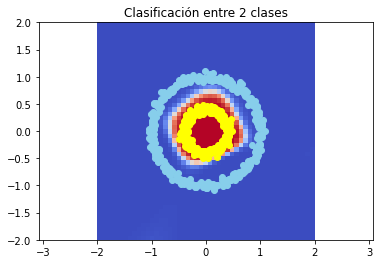

Iteracion 2780, MSE = 1.0715192118223382e-05


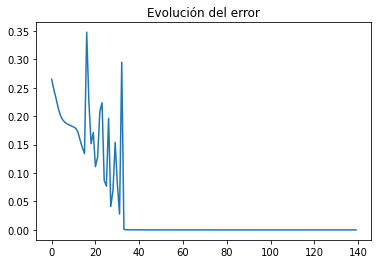

In [ ]:
import time 
from IPython.display import clear_output

#Se registrará el error de entrenamiento cada n iteraciones
error = []
iteraciones = 2800

#El entrenamiento se repite n iteraciones
for i in range(iteraciones):

  S = entrenar(red_neuronal, X, Y, funcion_error, tasa_aprend = 0.1)

  #Cada 20 iteraciones
  if i % 20 == 0:

    #Se guarda el error producido
    error.append(funcion_error[0](S, Y))

    # SE VAN A GENERAR 2 GRÁFICOS CADA 20 ITERACIONES:
    #GRÁFICO PARA VISUALIZAR SI LA RED SEPARA CORRECTAMENTE LAS 2 CLASES
    #GRÁFICO PARA VISUALIZAR LA EVOLUCIÓN DEL ERROR

    resolucion = 50

    #Se generan 50 numeros en el intervalo (-2, 2)
    #Para el eje x (_x0) e y (_x1)
    puntos_x = np.linspace(-2, 2, resolucion)
    puntos_y = np.linspace(-2, 2, resolucion)

    #np.zeros devuelve una matriz nxn de ceros
    salidas_validacion = np.zeros((resolucion, resolucion))

    #Se va a ejecutar 2500 (50x50) veces cada 20 iteraciones
    for n_fila, x in enumerate(puntos_x):
      for n_columna, y in enumerate(puntos_y):
        #Se genera una matriz 50x50 (salidas_validacion) de todas las salidas producidas
        #No se entrena sino que directamente se obtienen las salidas
        salidas_validacion[n_fila, n_columna] = entrenar(red_neuronal, np.array([[x, y]]), Y, funcion_error, entrenando=False)[0][0]
        #print(f'x={x}, y={y}, salida = {salidas_validacion[n_fila, n_columna]}')

    #puntos_x, puntos_y son las coordenadas de las esquinas cuadriláteras
    # salidas_validacion son los puntos de la matriz que deben asignarse en color
    plt.title("Clasificación entre 2 clases")
    plt.pcolormesh(puntos_x, puntos_y, salidas_validacion, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="yellow")

    #Los gráficos se actualizan dinámicamente (se borran y se vuelven a generar)
    #wait=True: se espera a borrar los gráficos hasta que haya un nuevo gráfico disponible
    clear_output(wait=True)
    plt.show()

    #Se muestra como varía el error cada 20 iteraciones
    #plot (x = n error calculado, y = error producido)
    plt.title("Evolución del error")
    plt.plot(range(len(error)), error)
    print(f'Iteracion {i}, MSE = {error[-1]}')
    plt.show()

    time.sleep(0.5)

